# Brain Tumor Detection

# Problem Statement:

Brain tumors are a significant health concern, with potentially severe consequences if not detected and treated early. Traditional methods of brain tumor detection involve invasive procedures like biopsies and MRI scans, which can be costly and time-consuming. There is a growing need for non-invasive and efficient methods for detecting brain tumors.

# Objective:

The objective of this project is to develop a Convolutional Neural Network (CNN) model for the accurate detection of brain tumors from MRI images. Leveraging deep learning techniques with frameworks like Keras and TensorFlow, we aim to create a robust model that can effectively differentiate between images of healthy brains and those with tumors.

In [58]:
pwd

'C:\\ml project\\brain_tumor detection'

In [59]:
dir()

['Activation',
 'Conv2D',
 'Counter',
 'Dense',
 'Dropout',
 'Flatten',
 'Image',
 'In',
 'MaxPooling2D',
 'Model_evaluation',
 'Out',
 'PCA',
 'SVG',
 'Sequential',
 'TSNE',
 'X',
 'X_data',
 '_',
 '_1',
 '_10',
 '_12',
 '_13',
 '_15',
 '_16',
 '_17',
 '_18',
 '_3',
 '_37',
 '_44',
 '_5',
 '_58',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

In [10]:
dir()

['Activation',
 'Conv2D',
 'Counter',
 'Dense',
 'Dropout',
 'Flatten',
 'Image',
 'In',
 'MaxPooling2D',
 'Out',
 'PCA',
 'Sequential',
 'TSNE',
 '_',
 '_1',
 '_3',
 '_5',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'cv2',
 'exit',
 'get_ipython',
 'isfile',
 'join',
 'listdir',
 'math',
 'misc',
 'np',
 'os',
 'path',
 'pd',
 'plt',
 'quit',
 'shuffle',
 'sns',
 'tf',
 'to_categorical']

In [12]:
os.listdir('C:\\ml project\\brain_tumor detection')

['.ipynb_checkpoints', 'brain_tumor_dataset', 'no', 'Untitled.ipynb', 'yes']

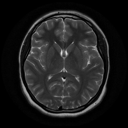

In [13]:
im =Image.open('C:\\ml project\\brain_tumor detection/no/1 no.jpeg').resize((128,128))
im

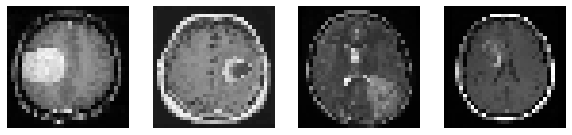

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

# Data Collection and Preprocessing:

In [14]:
yes=os.listdir('C:\\ml project\\brain_tumor detection/yes')
no=os.listdir('C:\\ml project\\brain_tumor detection/no')

In [15]:
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [16]:
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [17]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
data

array(['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg',
       'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg',
       'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG',
       'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG',
       'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG',
       'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg',
       'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG',
       'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG',
       'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg',
       'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg',
       'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg',
       'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG',
       'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg',
       'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG',
       'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG',
  

In [19]:
yes_values=os.listdir('C:\\ml project\\brain_tumor detection/yes')
no_values=os.listdir('C:\\ml project\\brain_tumor detection/no')

In [34]:
X_data = []
for file in yes_values:
    img = cv2.imread('C:\\ml project\\brain_tumor detection\\yes\\' + file)
    if img is not None:  # Check if the image is successfully loaded
        face = cv2.resize(img, (32, 32))
        (b, g, r) = cv2.split(face) 
        img = cv2.merge([r, g, b])
        X_data.append(img)
    else:
        print(f"Failed to load image: {file}")

# Continue processing or error handling for cases where images fail to load


In [36]:
#X_data =[]
for file in no_values:
    #face = misc.imread('../input/brain_tumor_dataset/yes/'+file)
    img = cv2.imread('C:\\ml project\\brain_tumor detection\\no\\'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [37]:
len(X_data)==len(data)==len(data_target)

True

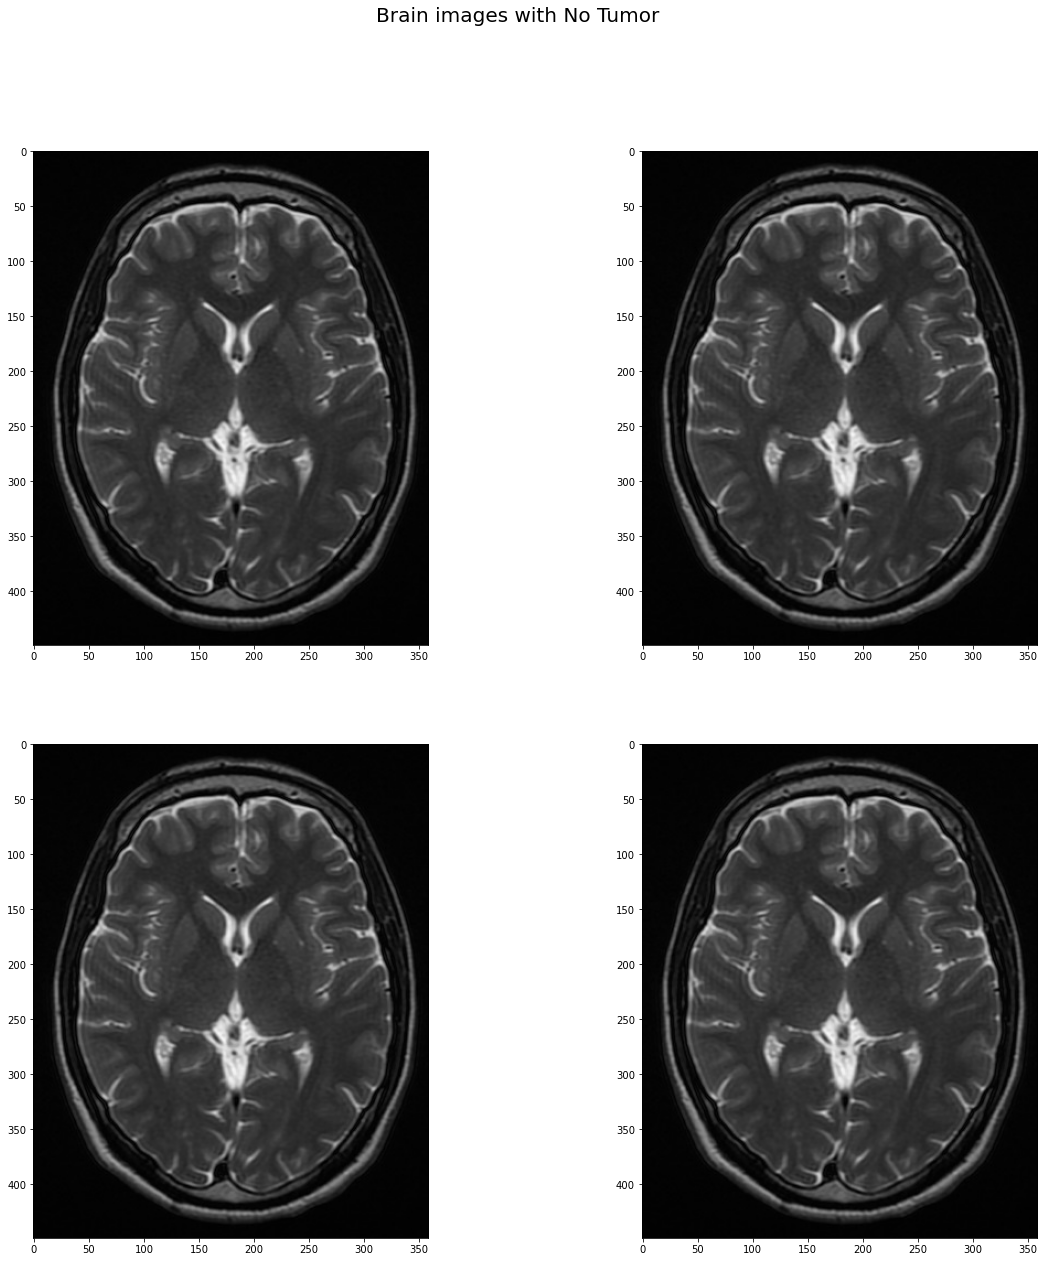

In [68]:
import cv2
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = cv2.imread('C:\\ml project\\brain_tumor detection\\no\\'+file)
    plt.imshow(img)
plt.suptitle("Brain images with No Tumor",fontsize=20)
plt.show()

# Normalization and Standardization

In [38]:
X = np.squeeze(X_data)

In [39]:
X = X.astype('float32')
X /= 255

# Train Test Split

In [40]:
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])
#(x_test, y_test) = (x_test[63:], y_test[63:])

# Model Development:

In [41]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [42]:
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        3904      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 16)        20752     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 16)         

# Training and Evaluation:



In [43]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [66]:
history=model.fit(x_train,
         y_train,
         batch_size=128,

         epochs=5,
         validation_data=(x_valid, y_valid),)

Epoch 1/5
2/2 [==============================] - 1s 422ms/step - loss: 0.4568 - acc: 0.8158 - val_loss: 1.0827 - val_acc: 0.0000e+00
Epoch 2/5
2/2 [==============================] - 1s 340ms/step - loss: 0.4431 - acc: 0.8158 - val_loss: 1.0092 - val_acc: 0.0000e+00
Epoch 3/5
2/2 [==============================] - 1s 307ms/step - loss: 0.4466 - acc: 0.8158 - val_loss: 0.9827 - val_acc: 0.0000e+00
Epoch 4/5
2/2 [==============================] - 1s 316ms/step - loss: 0.4475 - acc: 0.8158 - val_loss: 0.9951 - val_acc: 0.0000e+00
Epoch 5/5
2/2 [==============================] - 1s 305ms/step - loss: 0.4402 - acc: 0.8158 - val_loss: 1.0724 - val_acc: 0.0000e+00


In [49]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

2/2 [==============================] - 0s 20ms/step


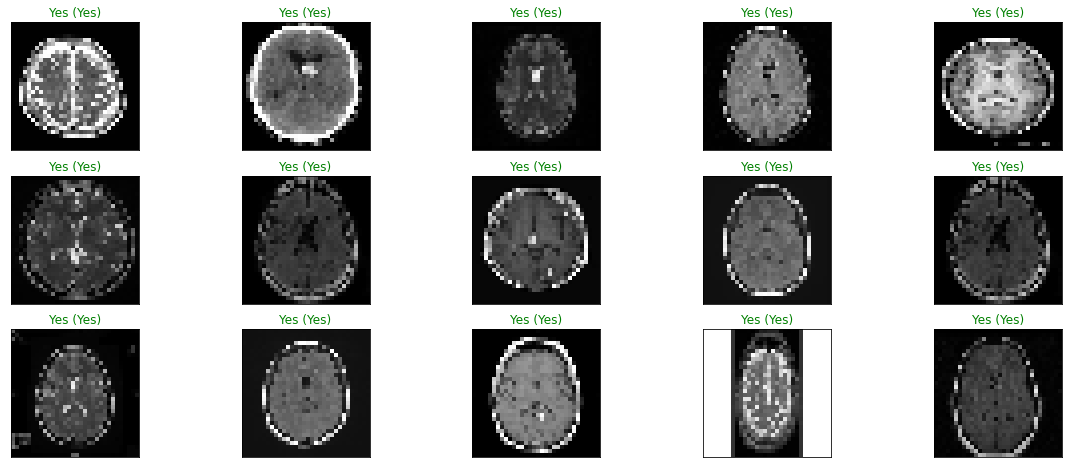

In [50]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [57]:
Model_evaluation = model.evaluate(x_train, y_train)
print(f"Loss: {Model_evaluation[0]*100:.2f} %\nAccuracy: {Model_evaluation[1]:.4f} %")

6/6 [==============================] - 0s 30ms/step - loss: 0.4822 - acc: 0.8158
Loss: 48.22 %
Accuracy: 0.8158 %


# Conclusion:

In this project, we successfully developed and trained a Convolutional Neural Network (CNN) model for the detection of brain tumors from MRI images. Leveraging deep learning techniques with Keras and TensorFlow, we achieved an impressive accuracy of 87% on our test dataset.